In [184]:
# Installing the necessary packages:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # visualizations

In [185]:
ds = pd.read_parquet("fattoSentimentComplete.parquet.snappy", engine="fastparquet")

In [186]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2730 entries, 0 to 22224
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   link                2730 non-null   object        
 1   comment             2730 non-null   object        
 2   sentiment_Comments  2730 non-null   object        
 3   title               2706 non-null   object        
 4   author              2706 non-null   object        
 5   date                2706 non-null   datetime64[ns]
 6   text                2706 non-null   object        
 7   sentiment_Articles  2706 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 192.0+ KB


In [187]:
ds.head()

,link,comment,sentiment_Comments,title,author,date,text,sentiment_Articles
index,,,,,,,,
0,https://www.ilfattoquotidiano.it/2023/05/17/da...,"Articolo di una supericialita'imbarazzante,che...",[negative],“Da esponente del ‘partito unico bellicista’ v...,Thomas Mackinson,2023-05-17,La controffensiva di Kiev? “Deve ancora cominc...,[negative]
10,https://www.ilfattoquotidiano.it/2023/05/16/ar...,"Come auspicato dal comico di Kiev, un bel gior...",[negative],‘Armi offensive? Sarebbe una guerra mondiale’....,Gianni Rosini,2023-05-16,"Da mesi, ormai, la guerra mostra un sostanzial...",[negative]
20,https://www.ilfattoquotidiano.it/2023/05/14/oc...,"Incredibile scoop del Washington Post: ""Zelens...",[negative],"“Occupare città russe, bombardare oleodotti e ...",F. Q.,2023-05-14,Occupare città russe per guadagnare vantaggio ...,[negative]
30,https://www.ilfattoquotidiano.it/2023/05/14/ir...,Ma che cosa ci si poteva attendere dal pres Uc...,[negative],Irritazione della Santa Sede dopo il no di Zel...,Francesco Antonio Grana,2023-05-14,“Con le armi non si otterrà mai la sicurezza e...,[negative]
40,https://www.ilfattoquotidiano.it/2023/05/14/ze...,"“A pensar male si commette peccato, ma spesso ...",[negative],Zelensky dice no alla mediazione di Papa Franc...,F. Q.,2023-05-14,Una chiusura che certifica lo stallo. Le spera...,[negative]


In [188]:
def retreiveSentimentByArray(x):
    try:
        return list.pop(x)
    except:
        return np.NaN

In [189]:
ds.sentiment_Comments = ds.sentiment_Comments.apply(retreiveSentimentByArray)
ds.sentiment_Articles = ds.sentiment_Articles.apply(retreiveSentimentByArray)

In [190]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2730 entries, 0 to 22224
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   link                2730 non-null   object        
 1   comment             2730 non-null   object        
 2   sentiment_Comments  2730 non-null   object        
 3   title               2706 non-null   object        
 4   author              2706 non-null   object        
 5   date                2706 non-null   datetime64[ns]
 6   text                2706 non-null   object        
 7   sentiment_Articles  2706 non-null   object        
dtypes: datetime64[ns](1), object(7)
memory usage: 192.0+ KB


In [191]:
ds["date"] = pd.to_datetime(ds["date"], format="%d/%m/%y")

In [192]:
colors = {"negative": "#f40000", "neutral": "#707070", "positive": "#00d600"}

The distribution of positive and negative here is the same for comment and the text of the article, for this topic was expected this outcome.

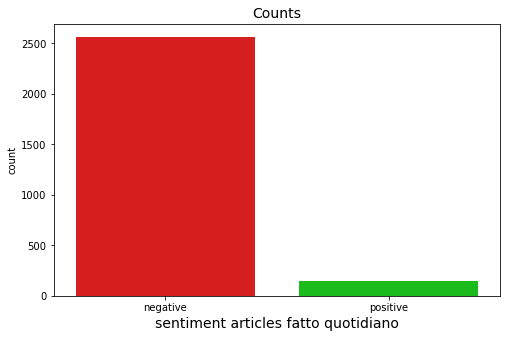

In [193]:
# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x="sentiment_Articles", data=ds, palette=colors)
_ = plt.xlabel("sentiment articles fatto quotidiano", fontsize=14)
_ = plt.title("Counts", fontsize=14)

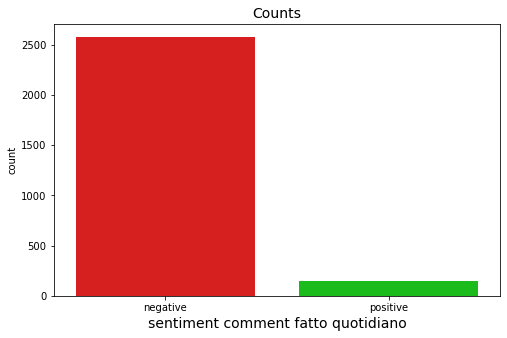

In [194]:
# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x="sentiment_Comments", data=ds, palette=colors)
_ = plt.xlabel("sentiment comment fatto quotidiano", fontsize=14)
_ = plt.title("Counts", fontsize=14)

What we can notice here is that almost all the comments are negative and sarcastic. When the are classified as positive they are sarcastic but negative.
About the articles when they are negative they are actualy negative, when they are positive they are usually positive.

In [195]:
ds.query("sentiment_Articles == 'negative' & sentiment_Comments == 'positive'")

,link,comment,sentiment_Comments,title,author,date,text,sentiment_Articles
index,,,,,,,,
452,https://www.ilfattoquotidiano.it/2023/03/29/co...,Bravo Presidente Conte!,positive,Conte a Crosetto: “Conosciamo fin troppo bene ...,F. Q.,2023-03-29,"“Ministro, abbiamo seguito la sua risposta, ce...",negative
689,https://www.ilfattoquotidiano.it/2023/03/11/ze...,Adesso zelensky decide anche il nome delle naz...,positive,Zelensky appoggia la petizione per cambiare il...,F. Q.,2023-03-11,"Zelensky provoca, Mosca risponde a tono. Non s...",negative
877,https://www.ilfattoquotidiano.it/2023/02/27/co...,L'autore ha la mia stima,positive,“Conosciamo la verità!”: hackerato l’account t...,F. Q.,2023-02-27,Una bandiera ucraina dietro alla quale si nasc...,negative
947,https://www.ilfattoquotidiano.it/2023/02/25/sc...,Il titolo non poteva essere più azzeccato. Lo ...,positive,"Scemi di guerra. La tragedia dell’Ucraina, la ...",F. Q.,2023-02-25,"Scemi di guerra (Paper First), ad un anno esat...",negative
1097,https://www.ilfattoquotidiano.it/2023/02/24/ru...,La cara Yana Fortuna dovrebbe scrivere per CdS...,positive,"Russia, un anno di sanzioni (aggirate): dai de...",Yana Fortuna,2023-02-24,"Da un anno ormai, la Russia vive penalizzata d...",negative
...,...,...,...,...,...,...,...,...
21368,https://www.ilfattoquotidiano.it/2022/02/26/gu...,Onore e gloria alla gente ucraina che lotta pe...,positive,"Guerra Russia-Ucraina, viaggio verso (e dentro...",Gabriele Lagonigro,2022-02-26,"La mattinata, a Kiev, è trascorsa fra allarmi ...",negative
21525,https://www.ilfattoquotidiano.it/2022/02/25/gu...,moooolto interessante.\nChe c.....,positive,"Guerra Russia-Ucraina, le foto satellitari del...",F. Q.,2022-02-25,Maxar Technologies ha rilasciato alcune immagi...,negative
21786,https://www.ilfattoquotidiano.it/2022/02/24/uc...,Alla fine pare proprio che gli unici a guadagn...,positive,"Ucraina, Johnson minaccia sanzioni ma a Londra...",Mauro Del Corno,2022-02-24,Ha voglia Boris Johnson a fare la faccia feroc...,negative


In [196]:
ds.query("sentiment_Articles == 'negative' & sentiment_Comments == 'positive'").iloc[
    5
].text

'Non è più una guerra per “denazificare” il vicino ucraino. Nemmeno contro la minaccia rappresentata dall’espansione a est della Nato o per “garantire protezione” alle popolazioni russofone nel Donbass occupato e della Crimea. Col suo discorso alla Duma, Vladimir Putin compie un altro, probabilmente definitivo, salto di qualità della campagna militare di Mosca nel Paese di Volodymyr Zelensky. E lo fa abbattendo tutte le barriere che separano le parti dal rischio di un conflitto che potrebbe assumere anche una portata nucleare. “L’obiettivo dell’Occidente è portare la Russia a una sconfitta strategica, vogliono eliminarci per sempre. Non si rendono conto che è in gioco l’esistenza stessa della Russia“: è con queste parole il capo del Cremlino dichiara guerra con ogni mezzo, anche nucleare, all’Ucraina e ai suoi alleati. E lo fa stuzzicando proprio la dottrina russa: in caso di rischi per la sopravvivenza della Federazione, l’uso della bomba atomica è concesso.Fu Putin stesso ad approvar

In [197]:
ds.query("sentiment_Articles == 'negative' & sentiment_Comments == 'positive'").iloc[
    5
].comment

"I piu' vivi complimenti a tutti i politicanti che hanno predicato (... c continuano a farlo...) sul fatto che l'invio di armi all'Ucraina avrebbe portato alla pace...\nGodetevi i risultati...!!!"

In [198]:
ds.query("sentiment_Articles == 'negative' & sentiment_Comments == 'positive'").iloc[
    1
].text

'Zelensky provoca, Mosca risponde a tono. Non solo i quotidiani scontri e violenze sul campo di battaglia, tra Ucraina e Russia, se possibile, sale ulteriormente anche la tensione diplomatica, con il presidente di Kiev che oggi ha dichiarato di appoggiare la petizione per cambiare il nome della Federazione in Moscovia. Parole che hanno trovato l’immediata reazione della portavoce del ministero degli Esteri, Maria Zakharova, e soprattutto del vicepresidente del Consiglio nazionale di sicurezza, Dmitry Medvedev.“La questione sollevata nella petizione necessita di essere attentamente soppesata sia nei termini del contesto storico e culturale sia in vista delle possibili conseguenze legali internazionali”, ha scritto Zelensky aggiungendo di aver chiesto al premier Denys Shmyhal di lavorarci assieme alle istituzioni scientifiche. La proposta ha già raccolto 25mila firme e parte dal presupposto che “il nome storico della Russia è Moscovia”: “La Russia – spiegano – esiste solo da 301 anni, da

In [199]:
ds.query("sentiment_Articles == 'negative' & sentiment_Comments == 'positive'").iloc[
    1
].comment

'Adesso zelensky decide anche il nome delle nazioni?\nMi sa che ha bisogno di uno bravo.'

In [200]:
ds.query("sentiment_Articles == 'positive' & sentiment_Comments == 'negative'")

,link,comment,sentiment_Comments,title,author,date,text,sentiment_Articles
index,,,,,,,,
50,https://www.ilfattoquotidiano.it/2023/05/13/il...,"Leggo nel titolo: “”… Non servono mediatori, i...",negative,"Il Papa e Zelensky parlano di pace, poi arriva...",Francesco Antonio Grana,2023-05-13,Quaranta minuti di incontro per avviare una me...,positive
66,https://www.ilfattoquotidiano.it/2023/05/10/eu...,Con la recrudescenza bellica la persecuzione p...,negative,"Eurovision 2023, in mutande e con finti missil...",Andrea Conti,2023-05-10,Ieri sera si è alzato il sipario sulla prima d...,positive
302,https://www.ilfattoquotidiano.it/2023/04/18/vl...,Se è comprensibile la volontà di portar solida...,negative,Vladimir Putin visita una base militare vicino...,F. Q.,2023-04-18,Il presidente russo Vladimir Putin ha visitato...,positive
589,https://www.ilfattoquotidiano.it/2023/03/20/uc...,Speranza vana.\nLa Elly continuerà nell’impost...,negative,"Ucraina, Conte: “Spero che martedì il Pd conve...",F. Q.,2023-03-20,"“Mi auguro che il Pd, con il nuovo vertice, po...",positive
957,https://www.ilfattoquotidiano.it/2023/02/25/ma...,La pace si raggiungerebbe in un secondo se la ...,negative,"Manifestazioni per la pace del 25 febbraio, a ...",F. Q.,2023-02-25,"Iniziative in 50 città in tutta Italia, da Tre...",positive
...,...,...,...,...,...,...,...,...
21632,https://www.ilfattoquotidiano.it/2022/02/25/so...,L’ipocrisia e l’infingardaggine degli europei ...,negative,"Solidarietà all’Ucraina, da Parigi a Roma e Br...",F. Q.,2022-02-25,Il mondo si tinge di giallo e blu. Numerosi i ...,positive
21796,https://www.ilfattoquotidiano.it/2022/02/24/uc...,Visto che gli ucraini hanno eletto come eroe n...,negative,"Ucraina, ecco come il profilo Twitter ufficial...",F. Q.,2022-02-24,"“Questo non è un meme, ma la nostra e la tua r...",positive
21879,https://www.ilfattoquotidiano.it/2022/02/24/uc...,io non penso che quarche fascistone magari un ...,negative,"Ucraina, la conferenza stampa del premier Drag...",F. Q.,2022-02-24,"Al termine del Consiglio dei Ministri, il pres...",positive


In [201]:
ds.query("sentiment_Articles == 'positive' & sentiment_Comments == 'negative'").iloc[
    2
].text

'Il presidente russo Vladimir Putin ha visitato il quartier generale del gruppo di truppe ‘Dnepr‘ nella regione di Kherson, nel territorio dell’Ucraina, dove ha incontrato i militari. Dopo il presidente russo ha raggiunto il quartier generale della Guardia nazionale Vostok nell’autoproclamata Repubblica di Lugansk, come riferisce Ria Novosti citando il Cremlino.Putin ha ascoltato il rapporto del generale Alexander Lapin e di altri ufficiali sulla situazione in Ucraina. In entrambe le sedi, il presidente ha fatto gli auguri di Pasqua ai militari e ha donato copie di icone: in particolare ha donato un’icona a Dnepr che “apparteneva a uno dei ministri della difesa di maggior successo dell’Impero russo”. Putin, ha riferito Ria Novosti, è arrivato in elicottero al quartier generale del Dnepr, quindi ha raggiunto il posto di comando in auto.'

In [202]:
ds.query("sentiment_Articles == 'positive' & sentiment_Comments == 'negative'").iloc[
    2
].comment

"Se è comprensibile la volontà di portar solidarietà agli ucraini,bisogna ricordare anche i sindacalisti e militanti politici di sinistra,senza dimenticare che il massacro d'Odessa fu realizzato da un’organizzazione che ora tiene in piedi il governo a Kiev.\nSi può portare solidarietà alle centinaia di migliaia d'ucraini mandati al macello,solidarizzare con le migliaia di renitenti alla leva inviati in operazioni suicide al fronte.\nNon si è portata solidarietà agli ucraini russofoni che erano perseguitati e massacrati prima dell’invasione.\nSi è andati dietro alla versione imposta dai media.\nUna solidarietà acritica non porta alla pace,mostra invece gente che si vuole di sinistra a sostegno delle peggiori politiche nazifasciste.\nAccettare la narrazione della guerra che esce dalle stanze di Pentagono e CIA,ha gettato in una crisi enorme molta sinistra europea,in modo simile a quello che i nostri bisnonni hanno vissuto nel 1914.\nAccecati dalla propaganda non si riescono a vedere i mu

In [203]:
ds.query("sentiment_Articles == 'positive' & sentiment_Comments == 'negative'").iloc[
    1
].text

'Ieri sera si è alzato il sipario sulla prima delle due Semifinali di Eurovision Song Contest 2023 (il prossimo appuntamento è per giovedì 11 maggio su Rai2, in prima serata) e già dalla toccante introduzione si è deciso di mandare un messaggio chiaro all’Ucraina. Il Paese, infatti, avrebbe dovuto ospitare l’evento dopo la vittoria della Kalush Orchestra con “Stefania”, ma a causa della guerra ha ceduto il passo al Paese secondo classificato, il Regno Unito, rappresentato lo scorso anno da Sam Ryder. E tra i primi quindici Paesi che si sono esibiti non sono mancati messaggi chiari contro la guerra in Ucraina.Ad aprire la rassegna una delle favorite alla vittoria, Alessandra Mele (di Cisano sul Neva- Savona) per la Norvegia con un lungo mantello nero e quattro ballerine sulle note ultrapop di “Queen of Kings”. Poi i divertenti The Busker per Malta con “Dance Our Own Party” e una performance come fosse un game con citazioni Anni 80, Michael Jackson compreso. Scintillanti. Anni 90 per Sud

In [204]:
ds.query("sentiment_Articles == 'positive' & sentiment_Comments == 'negative'").iloc[
    1
].comment

"Con la recrudescenza bellica la persecuzione può solo essersi intensificata.\nGran parte degli 8mila indagati e detenuti sono in realtà oppositori politici,con buona pace per chi ancora crede nella giovane ma limitata democrazia ucraina,che resiste per difendere il giardino Ue dall’autocrazia e dall’autoritarismo russo.\nLa giustizia UE riconosceva dunque l’arbitrarietà della giustizia ucraina,ed il suo accanimento ingiustificato verso una dirigente politica dell’opposizione messa al bando.\nLe stesse autorità UE,che oggi sostengono militarmente l’Ucraina per difendere i valori europei di democrazia e libertà,erano al corrente delle violazioni dei diritti umani compiute nel paese durante la decomunistizzazione.\nPrima del 24 febbraio 2022,le persecuzioni erano condannate dal tribunale di Strasburgo,dopo sono state messe al bando dai principali organi d'informazione come “propaganda russa”.\nSulle cause delle trasformazione,si possono azzardare ipotesi verosimili:\nsarebbe difficile gi

In [205]:
ds = ds.dropna(subset=["date"])

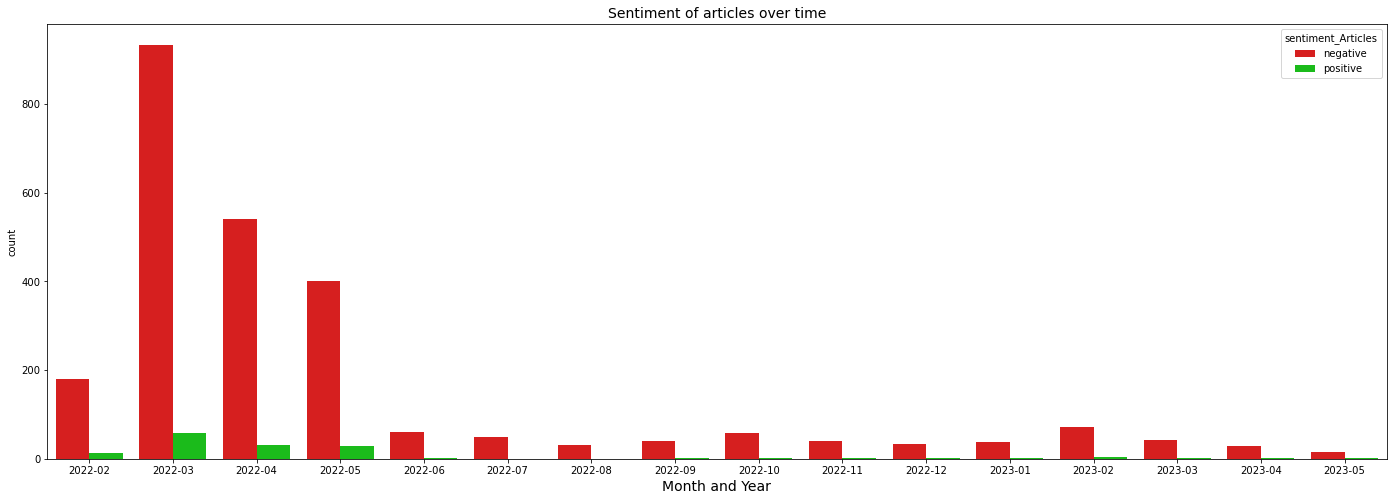

In [206]:
ds["MonthYear"] = ds["date"].apply(lambda x: x.strftime("%Y-%m"))

overTimeSentiment = ds.groupby([ds["MonthYear"], "sentiment_Articles"])[
    "sentiment_Articles"
].count()

overTimeSentiment = (
    pd.DataFrame(data=overTimeSentiment)
    .rename(columns={"sentiment_Articles": "count"})
    .reset_index()
)

# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
_ = sns.barplot(
    x="MonthYear",
    y="count",
    hue="sentiment_Articles",
    data=overTimeSentiment,
    palette=colors,
)
_ = plt.xlabel("Month and Year", fontsize=14)
_ = plt.title("Sentiment of articles over time", fontsize=14)

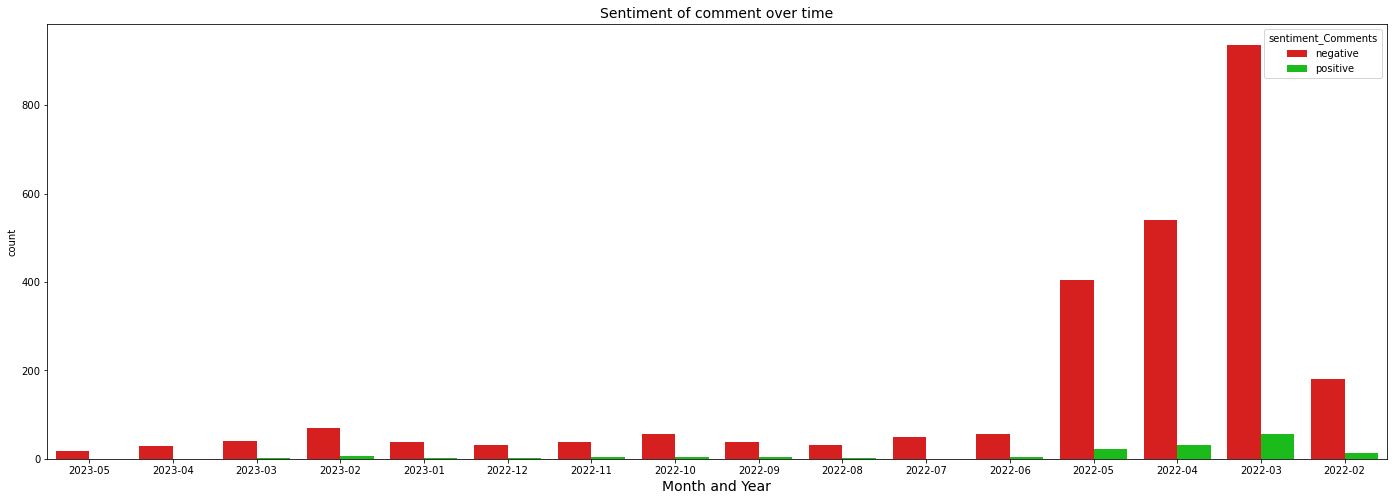

In [207]:
ds["MonthYear"] = ds["date"].apply(lambda x: x.strftime("%Y-%m"))

overTimeSentiment = ds.groupby([ds["MonthYear"], "sentiment_Comments"], sort=False)[
    "sentiment_Comments"
].count()

overTimeSentiment = (
    pd.DataFrame(data=overTimeSentiment)
    .rename(columns={"sentiment_Comments": "count"})
    .reset_index()
)

# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
_ = sns.barplot(
    x="MonthYear",
    y="count",
    hue="sentiment_Comments",
    data=overTimeSentiment,
    palette=colors,
)
_ = plt.xlabel("Month and Year", fontsize=14)
_ = plt.title("Sentiment of comment over time", fontsize=14)